<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team-1/blob/main/Semana4_Actividad4_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
### **Semana 4** - **Actividad 1. PCA**
###Prof Jobish Vallikavungal Devassia
<br>

###Equipo 1
###Alumno: Joel Orlando Hernández Ramos
###Matrícula: A00759664

###Alumno: Rafael Sánchez García
###Matrícula: A01182780

Fecha de entrega: Octubre 11, 2022

##**FUNDAMENTOS DEL ANÁLISIS PCA**

In the real life the data sets have too many variables or dimensions that increase their complexity. This is why the data scientists created different techniques to reduce the dimensionality of the data preserving as much information as possible. Here is where Principal Component Analysis or PCA comes in place. 

PCA is a dimensionality-reduction method that is often used to reduce large datasets by transforming the large amount of variables into a smaller one that contains most of the infomation. The main fundamental idea behind this technique is that, when we have a large set of data, all of the dimensions involved are not equally informative or important. Therefore, when applying PCA, the techinque creates a new set of variables, called Principal Components. The original explanatory variables are replaced with the Principal Components, which by definition, are uncorrelated with one another, thus eliminating redundancy. Although the new set of synthetic variables is equal in number to that in the original set, the first synthetic variables represents much of the common variation of the original data as possible. This allows the data scientist to reduce the number of variables needed for the analysis. The concept of being informative or important is measured by the variability along each particular feature space dimension, also denoted as variance.

Obviously, reducing the number of variables has in impact in our data, which is reducing accuracy, but PCA tries to keep this at the minimum. 

Having said that, PCA can be used in several scenarios. For example: 

1. It can be used to help visualize multidimensional data.
2. It can be used to compress information to store and transmit data more efficiently. For example, it has been used as a compressing method for images.
3. It can be used to simpify busines decisions.
4. When used as a data preprocessing tool, PCA can help us reduce the number of dimensions and also for noise reduction. 

However, when using PCA there are several assumptions and implications that you need to take into consideration: 

* It is important to mention that PCA is sensitive to the scaled information that leads to biased results, that is why prior PCA a standardization must be applied.
* PCA assumes correlation between dimensios or columns. 
* PCA implies that there is linear relationship between dimensions.
* PCA will have biased results in datasets with strong outliers. It is recommended to remove outliers before the analysis.
* When computing PCA in software tools, they often assume that the datasets have no missing values. Therefore, it is recommended to remove empty rows. 

In this exercise we will be using PCA with a given dataset from a Taiwanese bank. During the exercise, we will determine the principal components needed to keep most of the data, determine the importance of the original variables in the principal components and analyze whether using PCA was a good idea or not through an outlier analysis.

References:

Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin.

Jaadi. (2022). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. Retrieved 11 October 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

Keebola. (2022). A Guide to Principal Component Analysis (PCA) for Machine Learning. Keboola.com. Retrieved 11 October 2022, from https://www.keboola.com/blog/pca-machine-learning.

scikit-learn. (2022). sklearn.decomposition.PCA. scikit-learn. Retrieved 11 October 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.


##**PARTE 1 ANÁLISIS PCA**

###Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos 



We will start by importing the libraries we will need for this exercise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


After that, we will import the dataset. **It is important to mentioned that the dataset is exactly the same we analyzed and cleaned last week. Therefore this data set does not have null values and can be used for PCA.**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-team-1/main/Modulo3/Actividad3_DataSet.csv", index_col = 0)
df.index.name=None
df  #this will help us visualize the data. A preview

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


We will drop the variables that are categorical since the PCA does not work with this type of data. Based on the data set description, we know that the followings are conisdered as categorical. 

* X2 (GENDER)
* X3 (EDUCATION)
* X4 (MARITAL STATUS)
* X6-X11 (PAYMENT STATUS)

As you may remember, we consider this values categorical because we have a range of specific numerical values that should be used and specific categorical values for each numerical value. For example, in gender 1 = male; 2 = female.

In [3]:
df_num= df.drop(columns=['X2','X3','X4','X6','X7','X8','X9','X10', 'X11', 'Y'])
df_num.head() #we will visualize if we drop the desired columns correctly

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Since it is hard to identify what we are talking about in each column we will change the names of the columns.

In [4]:
df_num.columns = ['Credit','Age', 'bill_Sep','bill_Aug','bill_Jul','bill_Jun','bill_May','bill_Apr', 'paid_Sep','paid_Aug','paid_Jul','paid_Jun','paid_May','paid_Apr']
df_num

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


We will know look for the correlation between the variables. 

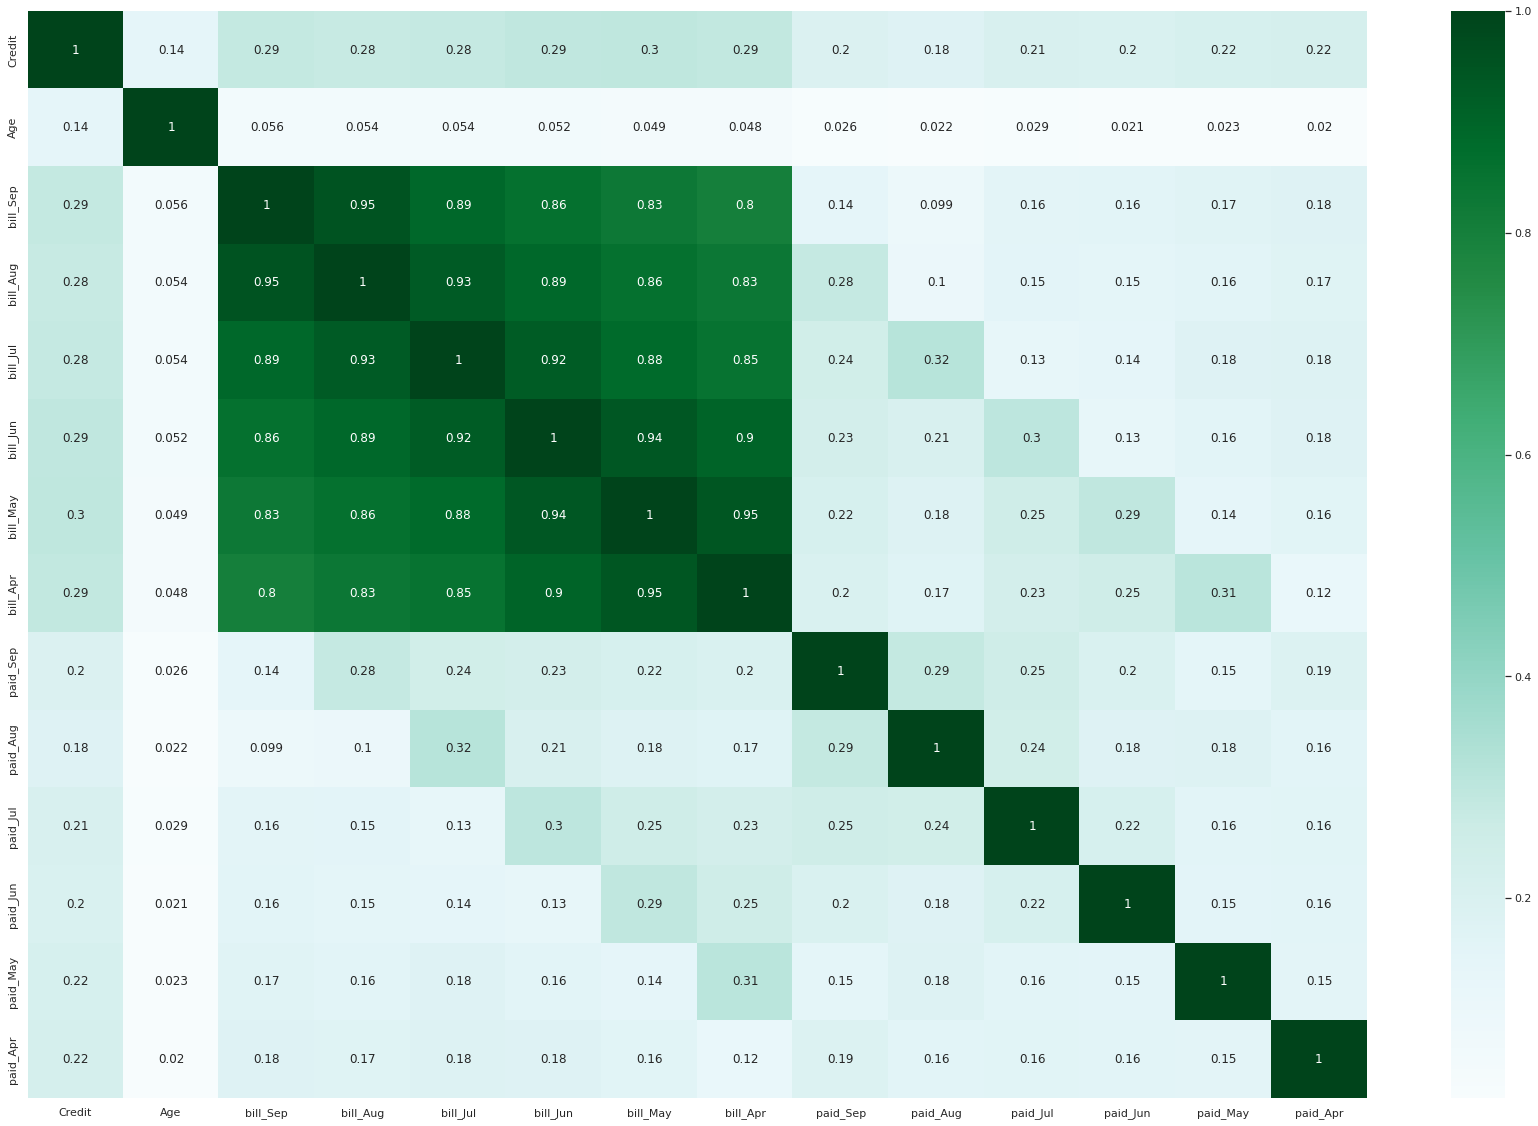

In [5]:
import seaborn as sns

correlation = df_num.corr()
sns.set(rc = {'figure.figsize': (30,20)})
sns.heatmap(correlation, annot = True, cmap = "BuGn")

The next step is to normalize the data before moving on to PCA since we don't want the PCA to have some kind of bias. 

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)

scaled_df_num= pd.DataFrame (scaled, columns=df_num.columns)
scaled_df_num

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.005241,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.006843,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.006843,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.007003,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.019658,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.010122,0.011723,0.001892
29991,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.005448,0.000000,0.000000
29992,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.011969,0.004689,0.005864
29993,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.008326,0.124174,0.003412


At this point it would be convinient to analyze our dataset's variance before and after normalization to double check that scaling it through Min Max was actually convenient. 

In [7]:
normal_summary = {
    "Variance" :df_num.var(),
    "Max Value" :df_num.max(),
    "Min Value" :df_num.min(),
    "Mean Value": df_num.mean()
                                  
}
pd.DataFrame(normal_summary).transpose()

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
Variance,1.683550e+10,84.911037,5.422774e+09,5.066211e+09,4.809809e+09,4.139133e+09,3.696562e+09,3.547020e+09,2.743833e+08,5.309967e+08,3.100562e+08,2.455098e+08,2.334885e+08,3.160874e+08
Max Value,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05
Min Value,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.272000e+03,0.000000e+00,0.000000e+00
Mean Value,1.674956e+05,35.482580,5.122893e+04,4.918465e+04,4.701845e+04,4.326780e+04,4.031559e+04,3.887752e+04,5.665801e+03,5.924937e+03,5.228206e+03,4.829892e+03,4.802688e+03,5.216260e+03


In [8]:
scaled_summary = {
    "Variance" :scaled_df_num.var(),
    "Max Value" :scaled_df_num.max(),
    "Min Value" :scaled_df_num.min(),
    "Mean Value": scaled_df_num.mean()
                                  
}
pd.DataFrame(scaled_summary).transpose()

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
Variance,0.017177,0.025241,0.004246,0.004563,0.00145,0.003673,0.003634,0.002095,0.000360,0.000187,0.000386,0.000630,0.001283,0.001131
Max Value,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min Value,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean Value,0.159086,0.249700,0.191851,0.112898,0.11216,0.200895,0.120624,0.290855,0.006486,0.003518,0.005835,0.012978,0.011260,0.009867


By analyzing both tables we can notice that after performing the MinMax Scale, our variance was able 

We are now going to apply PCA

In [9]:
from sklearn.decomposition import PCA

pcs = PCA()
pcs_columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
pcs_t = pcs.fit_transform(scaled_df_num)
pca_df=pd.DataFrame(pcs_t, columns=pcs_columns)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.262126,-0.026826,0.028143,-0.001057,0.000751,-0.000307,-0.000109,-0.000632,0.000694,-0.000037,0.000402,0.000399,0.000345,0.000618
1,-0.188326,0.006667,-0.041251,-0.005531,-0.003541,0.002140,-0.002320,-0.003183,-0.000202,-0.000140,-0.000292,0.000744,-0.000279,-0.000090
2,-0.076778,-0.064545,0.016637,-0.001541,0.004301,0.003343,-0.000173,-0.006529,0.003287,-0.000449,0.004961,-0.005172,-0.001219,-0.000418
3,-0.036630,-0.085235,0.081404,-0.005237,0.006529,-0.004503,0.002191,0.000428,-0.002555,0.001195,0.002454,0.005209,0.000922,-0.003399
4,0.231464,-0.306664,0.088169,0.012506,-0.016865,0.012706,0.003337,0.007416,0.003605,0.021082,0.006428,0.005085,-0.001481,0.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,0.128237,0.094423,0.071959,-0.058849,0.094887,-0.053504,0.013437,0.038277,0.001835,0.038815,-0.016759,0.021388,0.001403,-0.018017
29991,0.067272,-0.139528,-0.029758,-0.006356,-0.008636,0.002315,-0.005686,0.003563,0.006374,0.000308,-0.001632,0.000985,0.001959,-0.000402
29992,-0.064110,-0.129992,0.059827,0.015989,-0.016928,0.014737,-0.002722,0.003623,0.018352,-0.005279,-0.000415,0.004131,0.000903,-0.001469
29993,0.041315,-0.095424,0.068779,0.107969,0.015866,-0.051582,-0.021529,0.087342,-0.055130,-0.020616,-0.017007,-0.012809,-0.007900,-0.009933


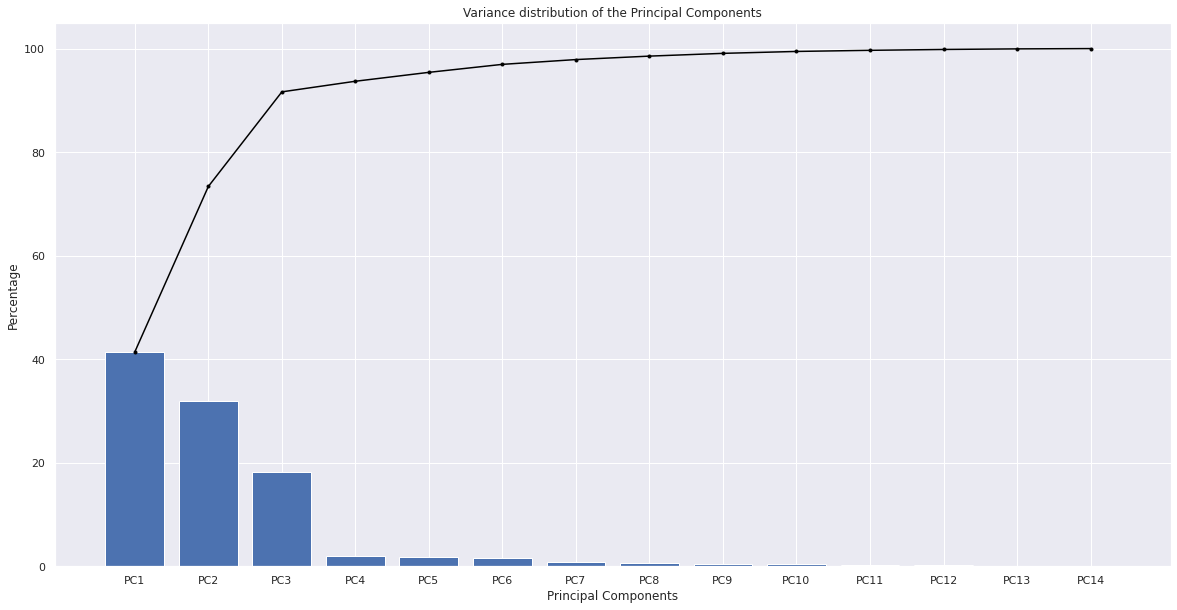

In [10]:
Explained_var=  np.round(pcs.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pcs.explained_variance_ratio_)*100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(pcs_columns,Explained_var)
plt.plot(pcs_columns,Acumulated_var, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of the Principal Components")
plt.show()

With this graph we can see that approximately 95% of our data is acumulated in the first 4 or 5 components. On the other hand, the last 6 or 7 components are not really significant and could be dropped.

However, let's doulbe check this information with actual numbers.

In [11]:
df_pca_variance= pd.DataFrame()
df_pca_variance['Explained_var']=Explained_var
df_pca_variance['Acumulated_var']=Acumulated_var
df_pca_variance.index=pcs_columns
df_pca_variance

,Explained_var,Acumulated_var
PC1,41.42,41.422397
PC2,31.95,73.370464
PC3,18.27,91.642499
PC4,2.05,93.690758
PC5,1.72,95.411107
PC6,1.54,96.954521
PC7,0.92,97.878636
PC8,0.67,98.545871
PC9,0.53,99.078571
PC10,0.37,99.447354


###**Results:**

Just as the bar graph described us, the minimum principal components that represents 95% of our data variation are the first five principal components.

###Paso 2: Interprete cada componente principal en términos de las variables originales. 

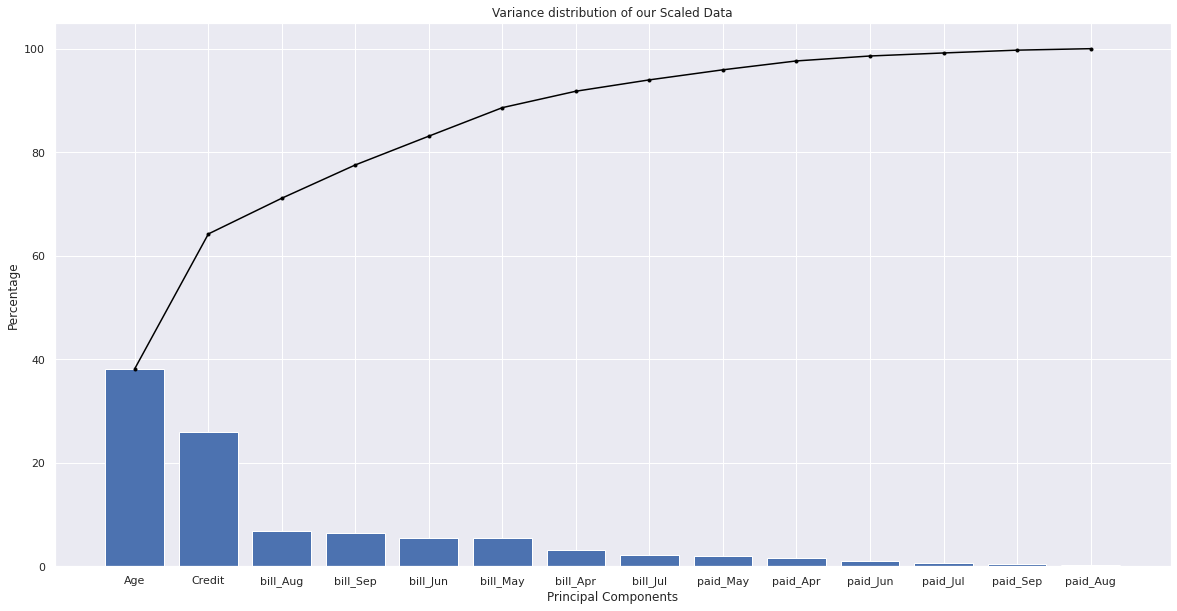

In [12]:
total_var =scaled_df_num.var().sum()

Explained_var_scaled=   (scaled_df_num.var()/ total_var)*100
df_scaled_variance= pd.DataFrame(Explained_var_scaled, columns=['Explained_var'])

df_scaled_variance.sort_values(by=['Explained_var'], ascending=False, inplace=True)

df_scaled_variance['Acumulated_var']= df_scaled_variance['Explained_var'].cumsum()



fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(df_scaled_variance.index,df_scaled_variance['Explained_var'])
plt.plot(df_scaled_variance.index,df_scaled_variance['Acumulated_var'], color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of our Scaled Data")
plt.show()


With this graph we can see that we reach approximately 95% of our data variance around the 8th or 9th variable. This is more compared with using only the first 5 components of the PCA analysis to represent 95% of our variance. 

However, let's doulbe check this information with actual numbers.

In [13]:
df_scaled_variance

,Explained_var,Acumulated_var
Age,38.211258,38.211258
Credit,26.003912,64.215170
bill_Aug,6.907580,71.122750
bill_Sep,6.428029,77.550779
bill_Jun,5.560094,83.110873
bill_May,5.502057,88.612930
bill_Apr,3.171129,91.784059
bill_Jul,2.194941,93.979000
paid_May,1.942905,95.921905
paid_Apr,1.712094,97.633999


We were actually wrong, if we used the scaled original value we would require 9 variables to reach 95% of our acumulated variance. That's a huge difference compared to requiring the first 4 principal components. 

Additionally, we can demonstrate that the PCA analysis itself is a good approach since it helps us keep 100% of the data. However, the loss of minimal information happens when the data scientists decide to choose a "n" number of principal components that explain most variabilty to reduce complexity.Demonstation will be shown below

In [14]:
print("Total variance of the original variables: ", scaled_df_num.var().sum())
print("Total variance of the components: ", pca_df.var().sum())


Total variance of the original variables:  0.06605669291950593
Total variance of the components:  0.06605669291950596


**This means that by choosing the first 5 components we will be able to explain 95% of the total variance shown above.**

Now, we will determine the weight that each of the original variable has on our each of our chosen components. 

By creating the following dataframe, we are able to see the magnitude each variable has per component. It is important to mention that the magnitude is an absolute number where the higher the value the more importance the variable has on the Principal Component calculation

In [ ]:
df_components = pd.DataFrame(
pcs.components_.round(4), 
columns = pca_df.columns, 
index = scaled_df_num.columns)
df_components=df_components.abs()
df_components.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Credit,0.4378,0.8240,0.1649,0.1716,0.0963
Age,0.5002,0.5555,0.3022,0.3179,0.1781
bill_Sep,0.7418,0.1111,0.3062,0.3307,0.1812
bill_Aug,0.0776,0.0055,0.1928,0.1761,0.0212
bill_Jul,0.0222,0.0006,0.4245,0.3289,0.0409
bill_Jun,0.0257,0.0028,0.2313,0.1624,0.0116
bill_May,0.0152,0.0001,0.2301,0.1044,0.1074
bill_Apr,0.0153,0.0004,0.2042,0.2764,0.1046
paid_Sep,0.0107,0.0004,0.3657,0.2250,0.2465
paid_Aug,0.0044,0.0002,0.0889,0.2715,0.5334


We can determine that the variables that has the most weight in our chosen Principal Components' are:

In [ ]:
result_var=df_components.iloc[:,:5].idxmax(axis=0) 
result_var=pd.DataFrame(result_var, columns=['Most_Important_Var'])
result_var

,Most_Important_Var
PC1,bill_Sep
PC2,Credit
PC3,bill_Jul
PC4,paid_Jun
PC5,paid_Apr


The direction of that magnitude is determmine by whether the coefficient was either negative or postive.

In [ ]:
df_components_direc = pd.DataFrame(
pcs.components_.round(4), 
columns = pca_df.columns, 
index = scaled_df_num.columns)
df_components_direc.iloc[:,:5]


,PC1,PC2,PC3,PC4,PC5
Credit,0.4378,0.8240,0.1649,0.1716,0.0963
Age,0.5002,-0.5555,0.3022,0.3179,0.1781
bill_Sep,-0.7418,0.1111,0.3062,0.3307,0.1812
bill_Aug,-0.0776,0.0055,-0.1928,-0.1761,-0.0212
bill_Jul,-0.0222,-0.0006,0.4245,0.3289,0.0409
bill_Jun,-0.0257,0.0028,-0.2313,-0.1624,-0.0116
bill_May,-0.0152,0.0001,0.2301,0.1044,-0.1074
bill_Apr,-0.0153,-0.0004,-0.2042,0.2764,0.1046
paid_Sep,-0.0107,-0.0004,0.3657,-0.2250,-0.2465
paid_Aug,-0.0044,-0.0002,0.0889,-0.2715,0.5334


###**Results:**

After finishing this analysis we can create the following dataframe to visualize which are the original variables that have the most impact in our Principal Components and whether that impact was positive or negative. 

In [ ]:
result_var['Direction']= [-0.7418,0.8240,0.4245,0.4937,-0.7044]
result_var

,Most_Important_Var,Direction
PC1,bill_Sep,-0.7418
PC2,Credit,0.8240
PC3,bill_Jul,0.4245
PC4,paid_Jun,0.4937
PC5,paid_Apr,-0.7044


###Paso 3: Identifique valores atípicos

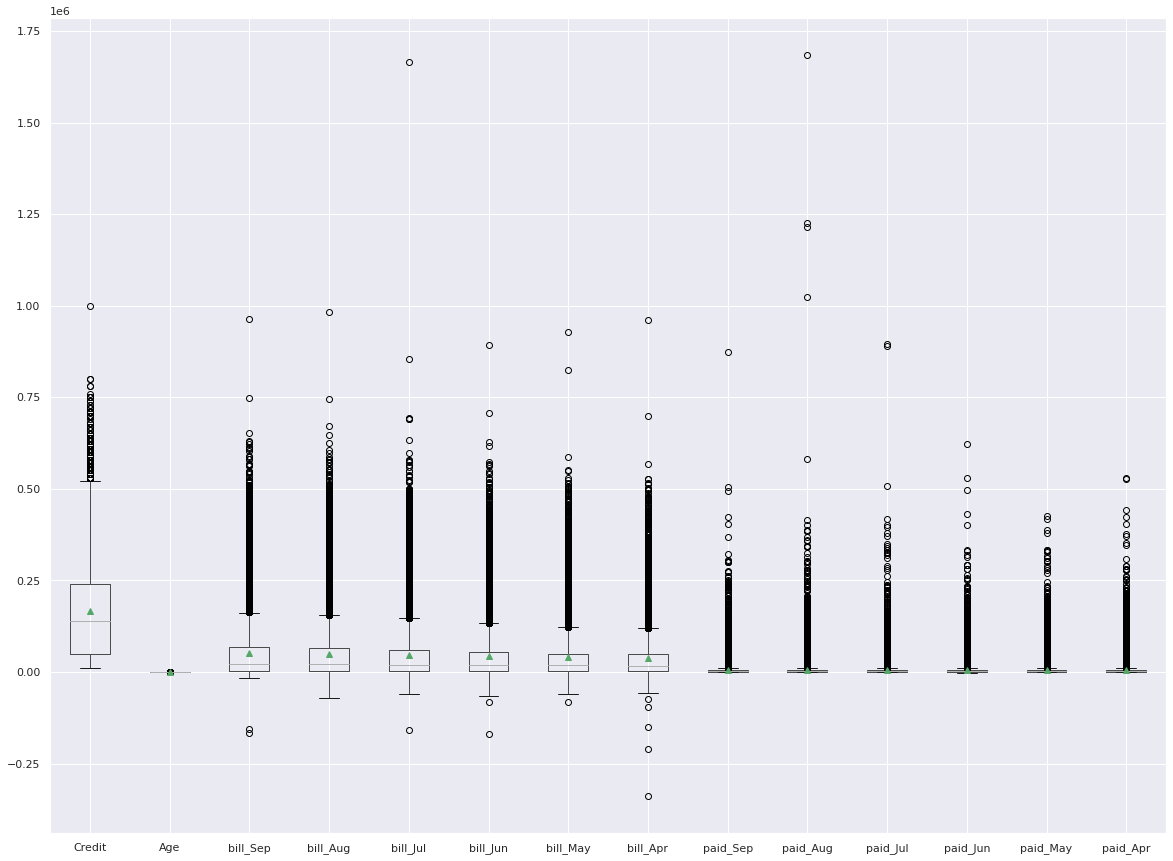

In [ ]:
outliers=df_num.boxplot(figsize = (20,15), showmeans=True)
outliers.plot()

plt.show()

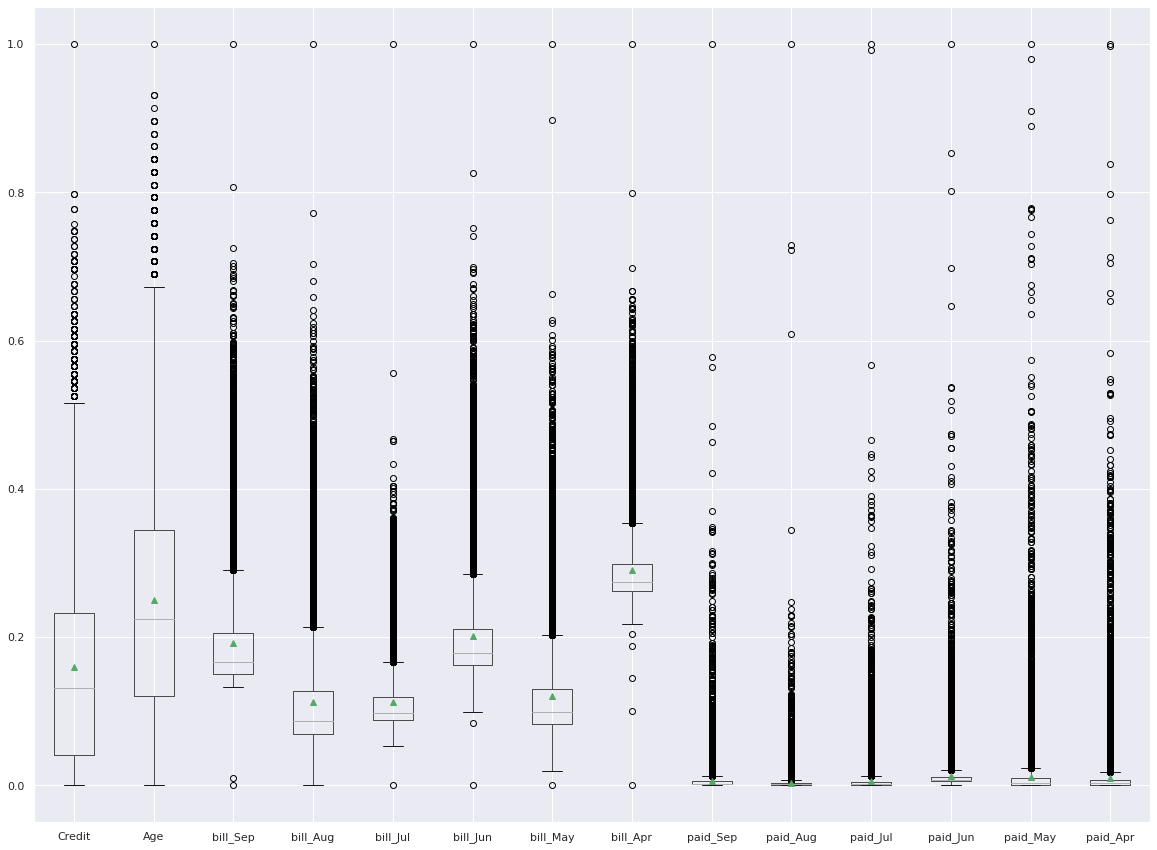

In [ ]:
scaled_outliers=scaled_df_num.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()

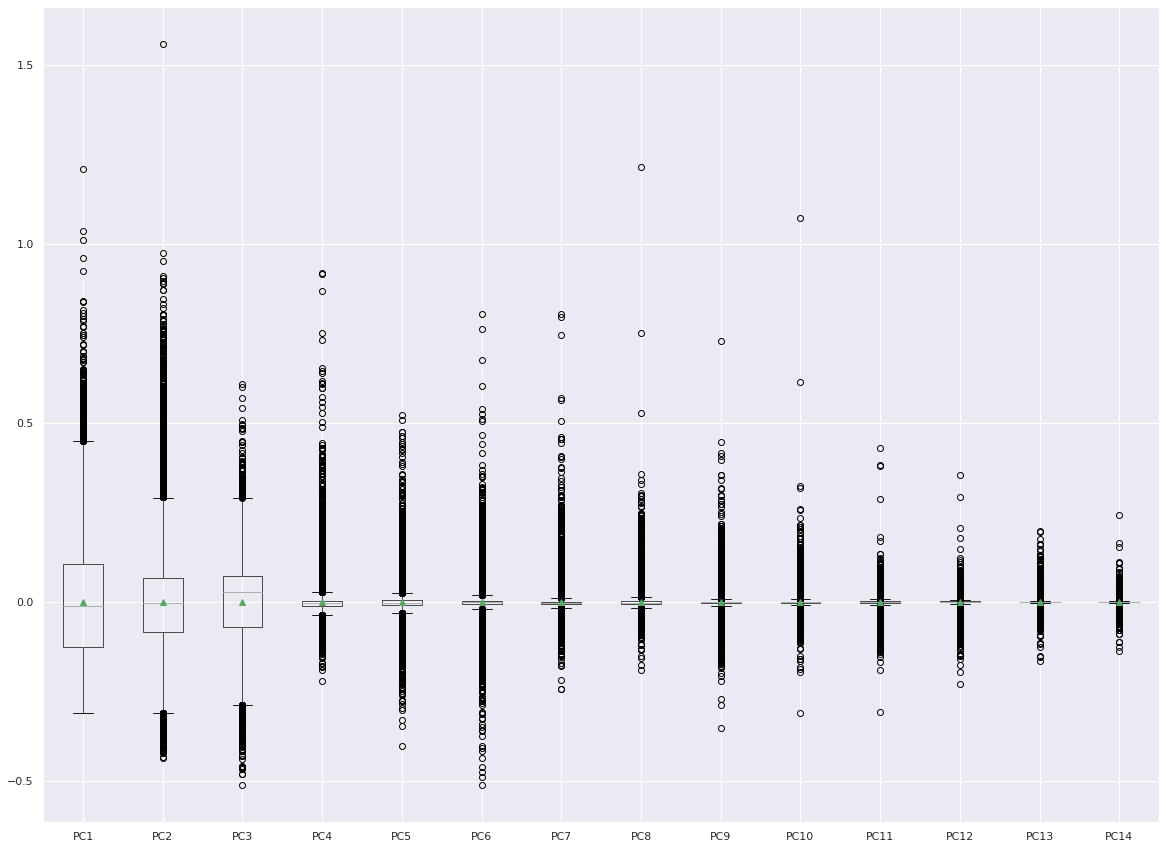

In [ ]:
scaled_outliers=pca_df.boxplot(figsize = (20,15), showmeans=True)
scaled_outliers.plot()

plt.show()

##**Results**

On this final section, we analyzed the distribution of our data through boxplots. Three figure were graphed: the first one for the data without standarization, the second one shows the data after being treated with the MinMax method and finally our data after PCA. In all of our graphs we can see that there is a high number of outliers in all numerical dimensions. This abnormal observations can be noticed in the graphs as the circles outside of the boxplot. 

These results can help us conclude that our Principal Component Analysis might not be the optimal since the outliers play an important role in the analysis. As explained at the begining, since PCA key factors are the variability and variance, having strong outliers that directly affect those factors will conclude in biased results. 

We know that it is recommended to remove outliers before the analysis. However, since our graphs are showing us that there are a lot of outliers, rather than removing them we need to analyze our data. All outliers should be analyzed carefully to obtain valuable information that will help us determine if we can remove them, or if our data have a really big distribution making the PCA not an ideal analysis for this dataset.


References:

NIST. (2022). What are outliers in the data?. NIST. Retrieved 11 October 2022, from https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm.

#Parte 2


1. **¿Cuál es el número de componentes mínimo y por qué?**

    First it is important to mention that according to bibliography, there is no well-accepted objtective way to decide how many principal components are enough. This is mainly beacause it deponds on the specific application and dataset we are working with. In this case, we as data analysts decided that the  minimun number of components would be 5 because that explained the 95% of the variability in the original data set.

2. **¿Cuál es la variación de los datos que representan esos componentes?**

    As mentioned before, The first five components represents 95% of the variability in our original dataset. According to our analysisi, the total variance of the original dataset and the total component variance is 0.06605, so it means that by choosing the first five components we are able to explain 95% of that total variance. 

3. **¿Cuál es la pérdida de información después de realizar PCA?**

    When PCA is applied each component keeps the information of the original variables. Just as demonstrated in our code, the total variance of the orginal dataset (normalized but without PCA) and the total component variance (after PCA) remain the same ( 0.06605). However, in the exercise, just the first 5 PCA will be used, which represent the 95% of the information. Therefore, 5% of the information where be lost.

4. **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

    Based on the five Principal Components that were chosen in our analysis, we have determined that the more and less important variables are: 

    * PC1: Bill_Sep  is the most important variable in our first component with a coeficient of 0.7418. On the other hand, paid_April is the less important variable with a coeficient of 0.0009. 

    * PC2: Credit is the most important variable in our second component with a coeficient of 0.8240. On the other hand, paid_May is the less important variable with a coeficient of 0.0000. 

    * PC3: Bill_Jul is the most important variable in our second component with a coeficient of 0.4245. On the other hand, paid_May is the less important variable with a coeficient of 0.0532. 

    * PC4: paid_Jun is the most important variable in our second component with a coeficient of 0.4937. On the other hand, paid_May is the less important variable with a coeficient of 0.1024. 

    * PC5: paid_Apr is the most important variable in our second component with a coeficient of 0.7044. On the other hand, paid_Jul is the less important variable with a coeficient of 0.0070. 

5. **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

    It is recommended to apply PCA when the data set has a lot of variables, which also are defined as dimentions, therefore, the complex of the modeling process increases and makes it difficult to process. This is why Principal Component Analisys is useful, because it will reduce the complexity by summerazing information in a saller ser of representative dimentions that collectively explain most of the variabilty in the original data set. 

    Using Principal Component Analiysy can give a insight interpretation of the data, because can retain patterns, trends of all the dimentions or variables.



References:

Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin.

Jaadi. (2022). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. Retrieved 11 October 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

Keebola. (2022). A Guide to Principal Component Analysis (PCA) for Machine Learning. Keboola.com. Retrieved 11 October 2022, from https://www.keboola.com/blog/pca-machine-learning.

scikit-learn. (2022). sklearn.decomposition.PCA. scikit-learn. Retrieved 11 October 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.
